In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
iris_file = pd.read_csv(r"C:\Users\ShashanK\OneDrive\Documents\iris.csv")

In [5]:
iris_file.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_file.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
iris_file.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
iris_file.shape

(150, 5)

In [9]:
iris_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris_file.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris_file.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
iris_file['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: >

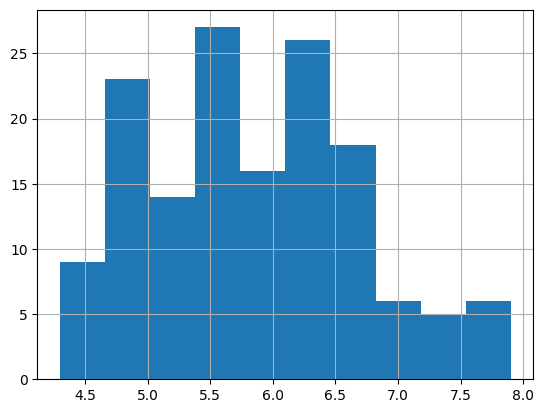

In [13]:
iris_file['sepal_length'].hist()

<Axes: >

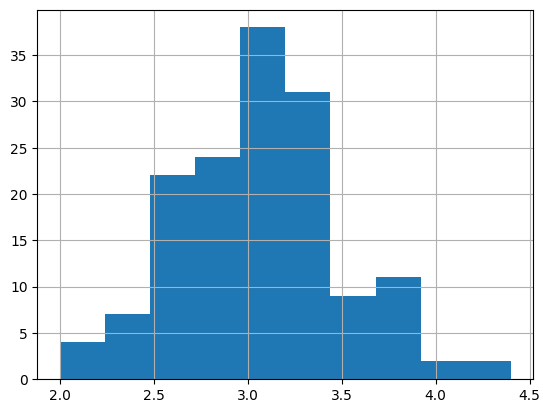

In [14]:
iris_file['sepal_width'].hist()

<Axes: >

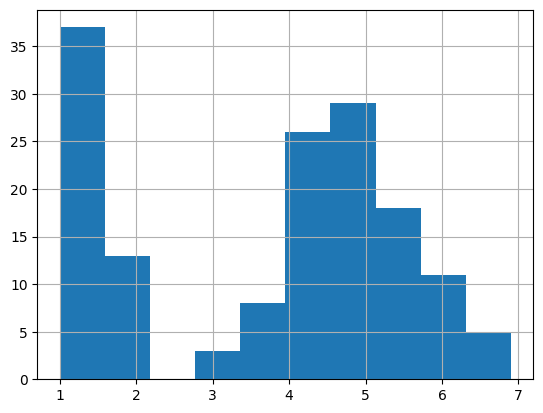

In [15]:
iris_file['petal_length'].hist()

<Axes: >

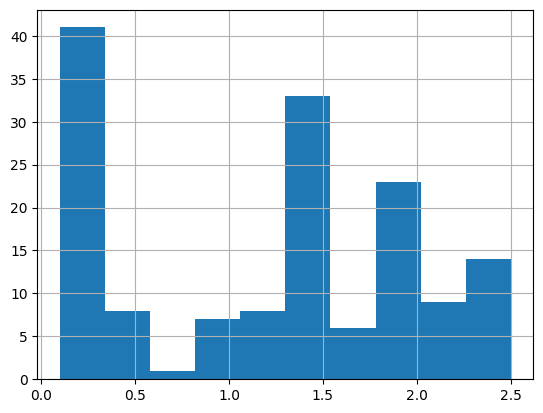

In [16]:
iris_file['petal_width'].hist()

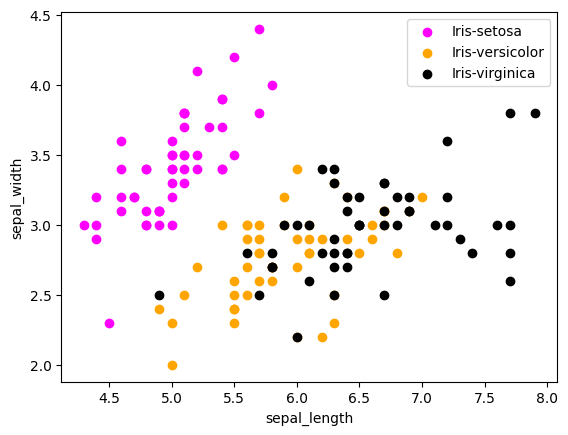

In [24]:
colors=['magenta','orange','black']
unique_species = iris_file['species'].unique()
for i in range(len(unique_species)):
    x = iris_file[iris_file['species'] == unique_species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=unique_species[i])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(unique_species)
plt.show()

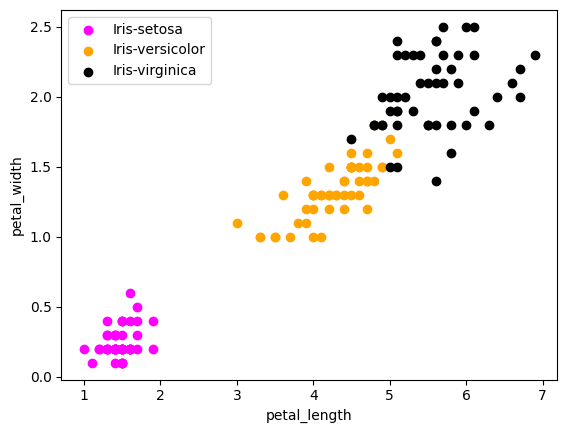

In [27]:
unique_species = iris_file['species'].unique()
for i in range(len(unique_species)):
    x = iris_file[iris_file['species'] == unique_species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=unique_species[i])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend(unique_species)
plt.show()

<Axes: >

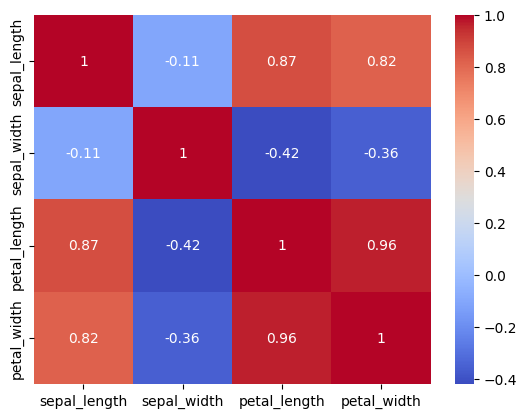

In [30]:
num_col = iris_file.drop(columns='species')
corr = num_col.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [31]:
lab_enc=LabelEncoder()
iris_file['species']=lab_enc.fit_transform(iris_file['species'])

In [32]:
iris_file['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [33]:
iris_file.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [34]:
x=iris_file.drop(columns='species')

In [35]:
y=iris_file['species']

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [47]:
log_reg= LogisticRegression()

In [48]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [49]:
knc = KNeighborsClassifier()

In [50]:
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [51]:
dtc= DecisionTreeClassifier()

In [52]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
log_reg.score(x_test,y_test)*100

96.66666666666667

In [61]:
knc.score(x_test,y_test)*100

100.0

In [62]:
dtc.score(x_test,y_test)*100

100.0

In [64]:
print(f"Accuracy by using Logistic Regression is {log_reg.score(x_test,y_test)*100}")
print(f"Accuracy by using K Nearest Neighbors Classifier is {knc.score(x_test,y_test)*100}")
print(f"Accuracy by using Decision Tree Classifier is {dtc.score(x_test,y_test)*100}")

Accuracy by using Logistic Regression is 96.66666666666667
Accuracy by using K Nearest Neighbors Classifier is 100.0
Accuracy by using Decision Tree Classifier is 100.0
